### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]

In [3]:
edad = []
altura = []
for elem in lista_alumnos:
    edad.append(elem[2])
    altura.append(elem[3])

In [4]:
X = np.array(edad)
y = np.array(altura)
X = X.reshape(-1,1)
X.shape

(14, 1)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

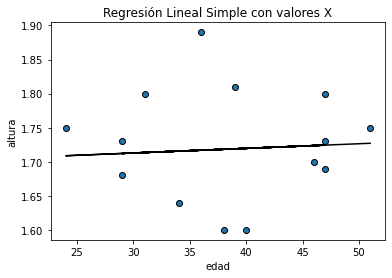

In [6]:
# Uso la función train_test_split para dividir los datos entre el conjunto de entrenamiento y el de test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Cargo el conjunto de entrenamiento al modelo de regresión lineal para calcular los coeficientes, es decir, entrenar al modelo.
lineal_reg = LinearRegression()# Creando objeto de regresion
lineal_reg.fit(X_train,y_train) # Entrenando, colamente con los valores "train"
plt.scatter(X,y, edgecolor='black') # Muestro todos los valores como puntos
plt.plot(X, lineal_reg.predict(X), color='k') #Dibujo la línea de la regresión lineal
plt.title('Regresión Lineal Simple con valores X')
plt.xlabel('edad')
plt.ylabel('altura')
plt.show()

En el gráfico anterior he ploteado todos los puntos X e y del conjunto incicial con el modelo entrenado solamente con los valores X_train e y_train (el 80% del total)

In [ ]:
lista_alumnos = [["Jalex", 6, 47, 1.80], ["Tomas", 5, 31, 1.80], ["David", 6, 39, 1.81], ["Natalio", 2, 29, 1.73], ["Monica", 3, 47, 1.73], ["Roxanna", 4,24,1.75], ["Filipa", 5,34,1.64], ["Elsa", 4, 36, 1.89], ["Cristina", 3, 46, 1.70], ["Alba", 3, 29, 1.68], ["Valeria",1, 40, 1.60], ["Jose Luis", 4, 47, 1.69], ["Rochi", 2, 38, 1.60], ["Jose Maria", 5, 51, 1.75]]
for elem in lista_alumnos:
    

In [7]:
# Uso la función train_test_split para dividir los datos entre el conjunto de entrenamiento y el de test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Cargo el conjunto de entrenamiento al modelo de regresión lineal para calcular los coeficientes, es decir, entrenar al modelo.
lin_reg = LinearRegression()# Creando objeto de regresion
lin_reg.fit(X_train,y_train) # Entrenando

LinearRegression()

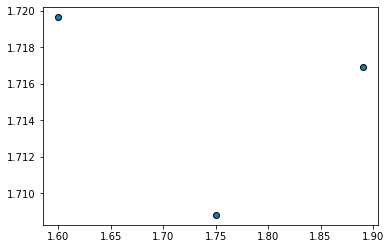

In [8]:
#Predicción de los resultados del conjunto de pruebas (X_test)
y_pred = lineal_reg.predict(X_test)

#Esto es para saber si nuestra prediccion tiene sentido comparando los valores y_test con los y' obtenidos de aplicarle el método predict a los X_test
plt.scatter(y_test,y_pred, edgecolor='black') # Muestro todos los valores como puntos
plt.show()

# No se aproxima a ninguna línea, por lo que nuestro modelo no es bueno.

In [9]:
lineal_reg.score (X_train, y_train)
# Nos dice el porcentaje de acierto sobre nuestros valores de entrenamiento

0.018684538444790566

In [10]:
lineal_reg.score (X_test, y_test)
# Nos dice el porcentaje de acierto sobre nuestros valores de test

-0.09263330306379491

------
Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python)

In [21]:
train_errors, test_errors = [], []

def plot_learning_curves(model, X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_test_predict = model.predict(X_test)

        train_errors.append(mean_squared_error(y, y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
        
        if m < 6:
            print("##### ITERACIÓN " + str(m) + " #####")
            print("x", x)
            print("y", y)
            print("y_train_predict", y_train_predict)
            print("-----\nX_test\n", X_test)
            print("y_test_predict", y_test_predict)

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(test_errors, "b-", linewidth=5, label="test")

##### ITERACIÓN 1 #####
x [[29]]
y [1.73]
y_train_predict [1.73]
-----
X_test
 [[47]
 [34]
 [51]]
y_test_predict [1.73 1.73 1.73]
##### ITERACIÓN 2 #####
x [[29]
 [24]]
y [1.73 1.75]
y_train_predict [1.73 1.75]
-----
X_test
 [[47]
 [34]
 [51]]
y_test_predict [1.658 1.71  1.642]
##### ITERACIÓN 3 #####
x [[29]
 [24]
 [38]]
y [1.73 1.75 1.6 ]
y_train_predict [1.70821192 1.76400662 1.60778146]
-----
X_test
 [[47]
 [34]
 [51]]
y_test_predict [1.50735099 1.65241722 1.46271523]
##### ITERACIÓN 4 #####
x [[29]
 [24]
 [38]
 [36]]
y [1.73 1.75 1.6  1.89]
y_train_predict [1.74883768 1.76036072 1.72809619 1.73270541]
-----
X_test
 [[47]
 [34]
 [51]]
y_test_predict [1.70735471 1.73731463 1.69813627]
##### ITERACIÓN 5 #####
x [[29]
 [24]
 [38]
 [36]
 [39]]
y [1.73 1.75 1.6  1.89 1.81]
y_train_predict [1.75338129 1.75026379 1.75899281 1.7577458  1.75961631]
-----
X_test
 [[47]
 [34]
 [51]]
y_test_predict [1.76460432 1.7564988  1.76709832]


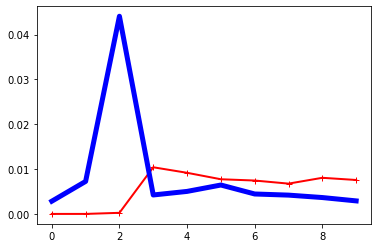

In [22]:
lin_reg = LinearRegression()
plot_learning_curves(model=lineal_reg, X=X, Y=y)

In [23]:
print("|||||||||||ERRORES||||||||||||")
print("train_errors\n\n", train_errors)
print("test_errors\n\n", test_errors)

|||||||||||ERRORES||||||||||||
train_errors

 [0.0, 0.0, 0.00024381898454745908, 0.010403106212424837, 0.00917103117505994, 0.007731694828469026, 0.007444833519345234, 0.006756194581280785, 0.008055282133178472, 0.0075671126164267525]
test_errors

 [0.0028333333333333387, 0.007249333333333346, 0.04408643517097192, 0.004224264159581687, 0.005020593980451117, 0.006444701326015454, 0.004444436186331299, 0.004191764137283941, 0.0036518885448662028, 0.0029041754584955212]


----------
Ahora calculo el MSE y el RMSE 

In [38]:
MSE = metrics.mean_squared_error(y_test, y_pred) 
print('MSE: ', round(MSE,4))
print('RMSE: ', round(np.sqrt(MSE),4))

MSE:  0.0153
RMSE:  0.1238


El mejor error para este ejercicio es el MSE (error medio cuadratico)

----------
Ahora calculo el MSE y el RMSE utilizando la función regresion_result 

In [40]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  # Si se acerca a 1, habrá aprendido todos los patrones de nuestro modelo.  
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [41]:
regression_results(y_true=y_test, y_pred=y_pred)
#y_pred = lineal_reg.predict(X_test)

explained_variance:  -0.0217
mean_squared_log_error:  0.002
r2:  -0.0926
MAE:  0.1113
MSE:  0.0153
RMSE:  0.1238


-------------------
Representa la matriz de correlación, ¿los datos están correlacionados?

In [27]:
# Convierto la lista de alumnos a un dataframe
from pandas import DataFrame
df = DataFrame (lista_alumnos,columns=['nombre','mesa','edad', 'altura'])
df

,nombre,mesa,edad,altura
0,Jalex,6,47,1.80
1,Tomas,5,31,1.80
2,David,6,39,1.81
3,Natalio,2,29,1.73
4,Monica,3,47,1.73
5,Roxanna,4,24,1.75
6,Filipa,5,34,1.64
7,Elsa,4,36,1.89
8,Cristina,3,46,1.70
9,Alba,3,29,1.68


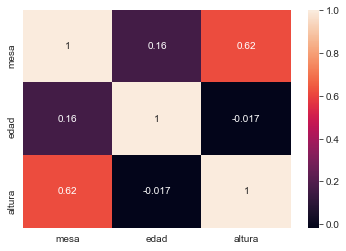

In [29]:
import seaborn as sns
sns.set_style('whitegrid')

sns.heatmap(df.corr(), annot = True)

No existe correlación entre la altura y la edad en la muestra que tenemos

MAE - Median Absolute Error. Error medio absoluto

MSE - Mean squared error. Error cuadrático medio

RMSE - Raiz cuadrada del error cuadrático medio

MSLE - Mean squared logaritmic error. Error logaritmico cuadratico medio



Aunque multiplique la altura o la edad por dos, seguirá sin haber correlación entre las dos variables